# Introduction

### Prologue

Welcome to the Computer Vision Assignment Nagar (CVAN), where everyone has to solve some set of problems to go from location A to location B. There are total 5 places (A, B, C, D, E) in the CVAN with equally distributed rewards.
<br/><br/>
After visiting all the 5 places you will able to reach a glorious palce ResultPura (RP).
<br/><br/>
Prof. Shanmuganathan Raman is Time Variant Authority (TVA) of this universe, if found you copying the assignment or exam or any malpractice then instead of reaching ResultPura you will reach ZeroPura.
<br/><br/>
<b>Special fact about CVAN is you have to solve everything with some vision algorithm.</b>

### Task

You are currently at place A. Your task is to solve series of questions given below which will lead you to the final task of solving a JigSaw puzzle mystery. Someone has altered the reality of CVAN and makes changes in the vision algorithm of the brain and because of it everyone is now observing real world as jigsaw images in their vision and causing chaos in their daily life.
<br/><br/>
<b>Note: Only you can save them by not copying the assignment from others and but you can discuss with your friends.</b>

# Task

### Pre-defined code

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading all the images in the drive
gt_images = []

for files in tqdm(natsorted(glob('/content/drive/My Drive/ES666CV/images/A/*'))):
    gt_images.append(cv2.imread(files, 1))

gt_images = np.array(gt_images) # Only possible because all images are of same size

100%|██████████| 4/4 [00:00<00:00, 139.22it/s]


In [ ]:
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

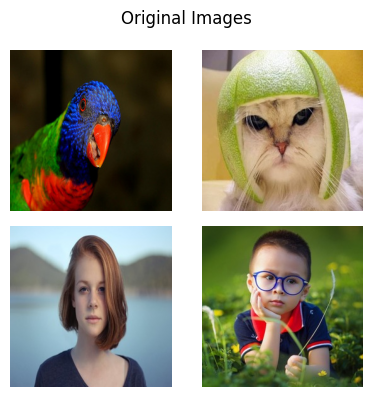

In [ ]:
show_image_grid(gt_images, 2, 2, 'Original Images')

### Q1 [2 Marks]

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [ ]:
def add_impulse_noise_s_p(image, noise_prob):
    noisy_image = image.copy()
    height, width, channels = noisy_image.shape

    # Loop over each pixel
    for i in range(height):
        for j in range(width):
            random_value = np.random.rand()
            # Salt (white pixel for RGB)
            if random_value < noise_prob / 2:
                noisy_image[i, j] = [255, 255, 255]  # Set the pixel to white in RGB
            # Pepper (black pixel for RGB)
            elif random_value > 1 - noise_prob / 2:
                noisy_image[i, j] = [0, 0, 0]  # Set the pixel to black in RGB

    return noisy_image

def add_gaussian_noise(image, mean, std):
    noisy_image = image.copy().astype(np.float32)
    height, width, channels = noisy_image.shape

    # Create Gaussian noise matrix
    gaussian_noise = np.random.normal(mean, std, (height, width, channels))

    # Add the noise to the image
    noisy_image += gaussian_noise

    # Clip values to stay within valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

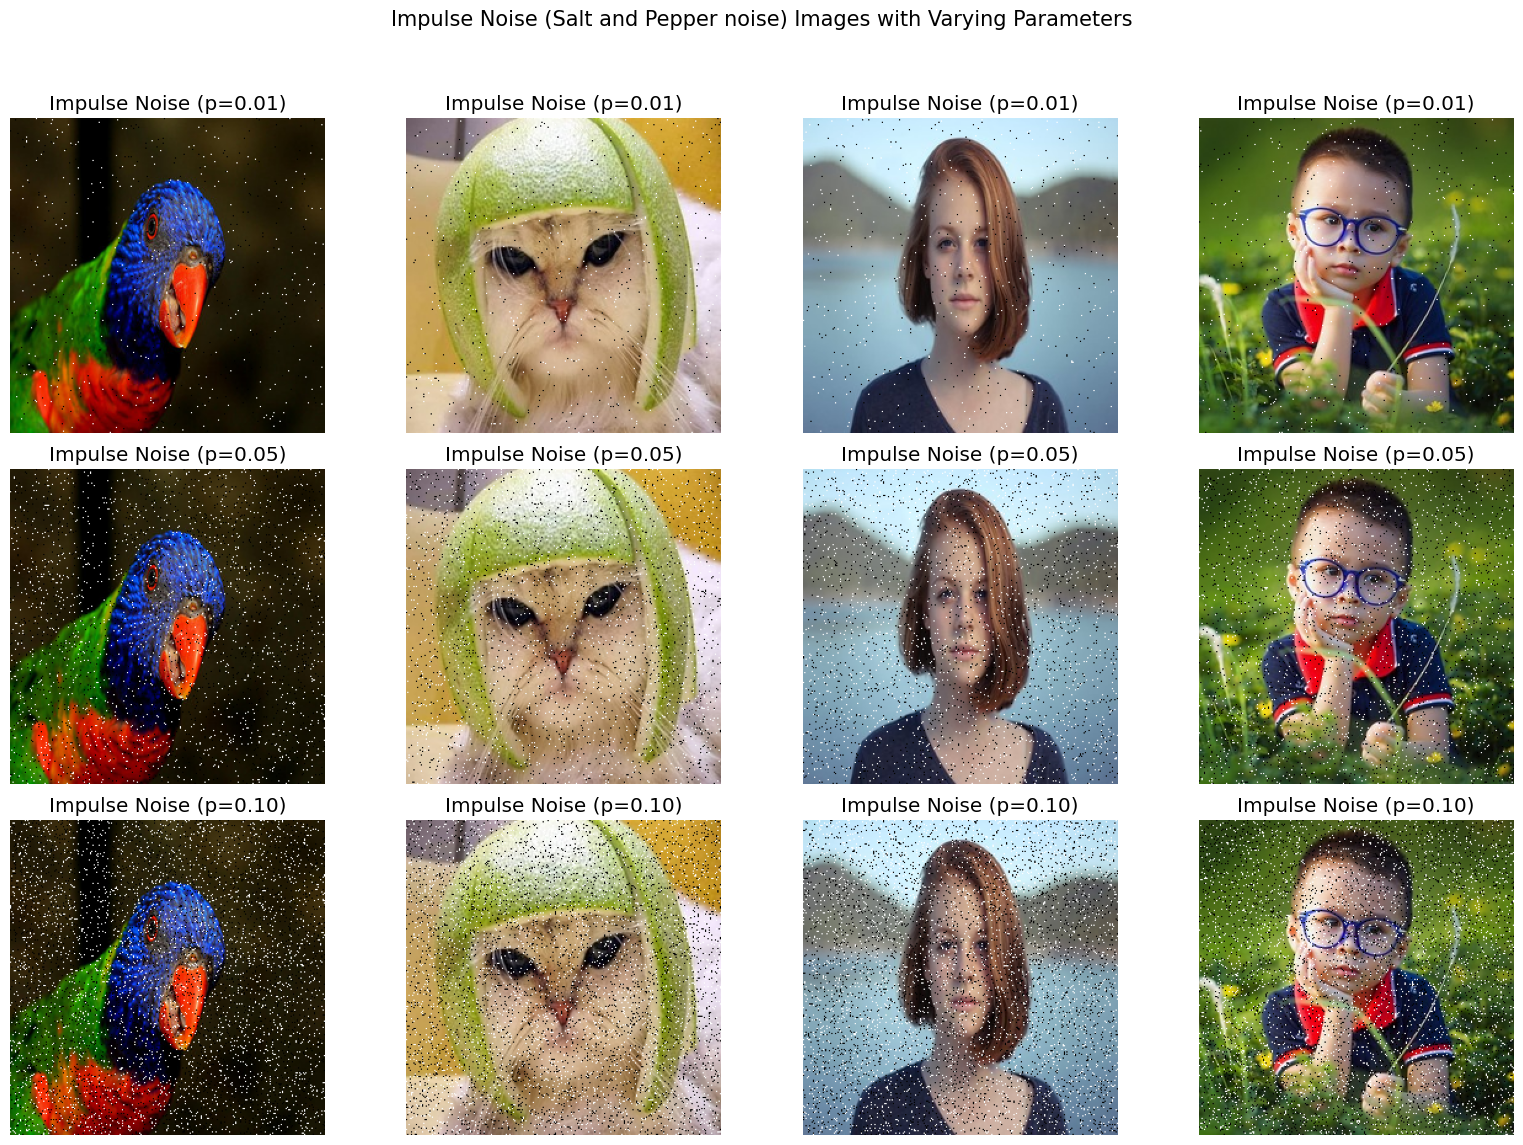

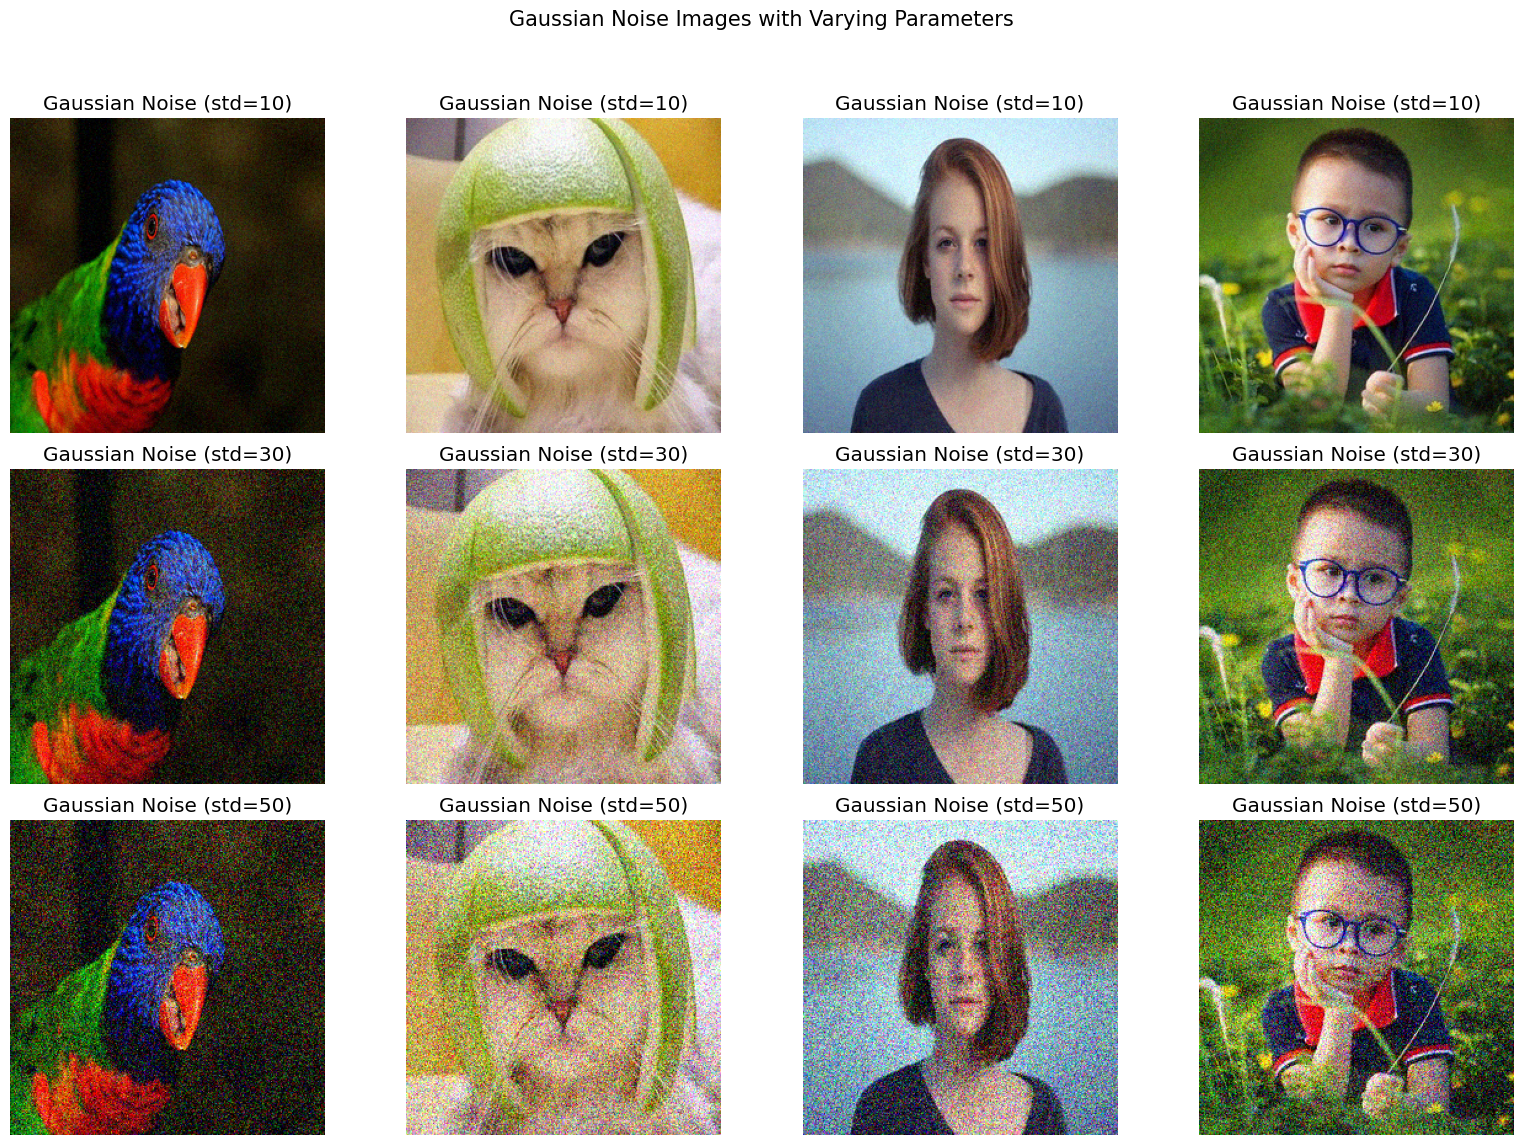

In [ ]:
# Lists to store noisy images
impulse_noisy_images = []
gaussian_noisy_images = []

# Define noise parameters to test
impulse_noise_probs = [0.01, 0.05, 0.1]  # Different probabilities for salt and pepper noise
gaussian_stds = [10, 30, 50]  # Different standard deviations for Gaussian noise

# Applying variations of impulse noise (s & p)
for prob in impulse_noise_probs:
    for image in gt_images:
        impulse_noisy_images.append(add_impulse_noise_s_p(image, noise_prob=prob))

# Applying variations of Gaussian noise
for std in gaussian_stds:
    for image in gt_images:
        gaussian_noisy_images.append(add_gaussian_noise(image, mean=0., std=std))

# Convert lists to numpy arrays
impulse_noisy_images = np.array(impulse_noisy_images)
gaussian_noisy_images = np.array(gaussian_noisy_images)

# Function to plot images for each noise type
def plot_image_grid(noisy_images, titles, title_prefix, M, N):
    fig, axes = plt.subplots(M, N, figsize=(N * 4, M * 4))
    fig.suptitle(f"{title_prefix} Images with Varying Parameters", fontsize=15)

    for i, (img, title) in enumerate(zip(noisy_images, titles)):
        row = i // N
        col = i % N
        ax = axes[row, col]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Titles for the impulse noise (s & p) images
impulse_titles = [f"Impulse Noise (p={p:.2f})" for p in impulse_noise_probs for _ in range(len(gt_images))]

# Titles for the Gaussian noise images
gaussian_titles = [f"Gaussian Noise (std={std})" for std in gaussian_stds for _ in range(len(gt_images))]

# Display all impulse noise (s & p) images
plot_image_grid(impulse_noisy_images, impulse_titles, "Impulse Noise (Salt and Pepper noise)", M=len(impulse_noise_probs), N=len(gt_images))

print()

# Display all Gaussian noise images
plot_image_grid(gaussian_noisy_images, gaussian_titles, "Gaussian Noise", M=len(gaussian_stds), N=len(gt_images))

In [ ]:
impulse_noisy_images.shape

(12, 256, 256, 3)

In [ ]:
gaussian_noisy_images.shape

(12, 256, 256, 3)

### Q2 [3 Marks]

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

In [ ]:
def apply_box_filter(image, kernel_size):
    height, width, channels = image.shape
    pad = kernel_size // 2

    # Pad the image with zero padding
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    blurred_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                region = padded_image[i:i + kernel_size, j:j + kernel_size, c]
                blurred_image[i, j, c] = np.mean(region)

    return blurred_image

def apply_gaussian_filter(image, kernel_size, sigma):
    # Create Gaussian kernel
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)  # Normalize

    # Apply Gaussian filter using convolution
    height, width, channels = image.shape
    pad = kernel_size // 2

    # Pad the image with zero padding
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    blurred_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                region = padded_image[i:i + kernel_size, j:j + kernel_size, c]
                blurred_image[i, j, c] = np.sum(region * kernel)

    return blurred_image

def apply_median_filter(image, kernel_size):
    height, width, channels = image.shape
    pad = kernel_size // 2

    # Pad the image with zero padding
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                region = padded_image[i:i + kernel_size, j:j + kernel_size, c]
                filtered_image[i, j, c] = np.median(region)

    return filtered_image

In [ ]:
impulse_noisy_images1  = []
gaussian_noisy_images1 = []

for image in gt_images:
    impulse_noisy_images1.append(add_impulse_noise_s_p(image, noise_prob=0.05))
    gaussian_noisy_images1.append(add_gaussian_noise(image, mean=0., std=30))

impulse_noisy_images1 = np.array(impulse_noisy_images1)
gaussian_noisy_images1 = np.array(gaussian_noisy_images1)

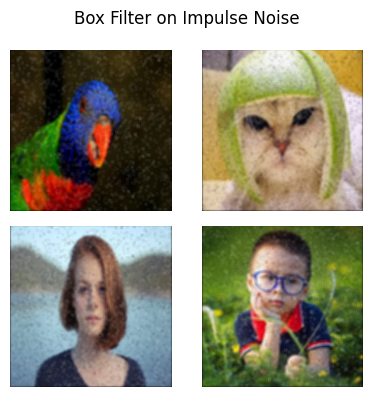

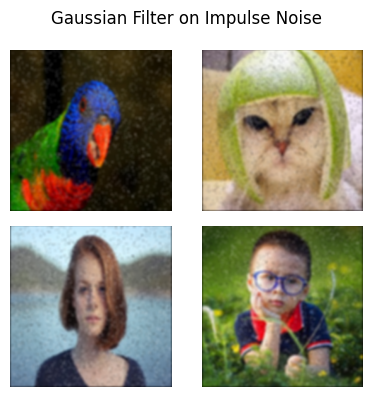

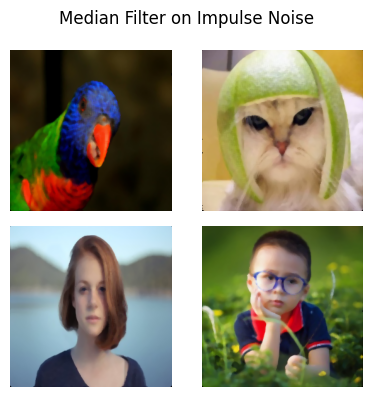

In [ ]:
box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images1:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Impulse Noise')

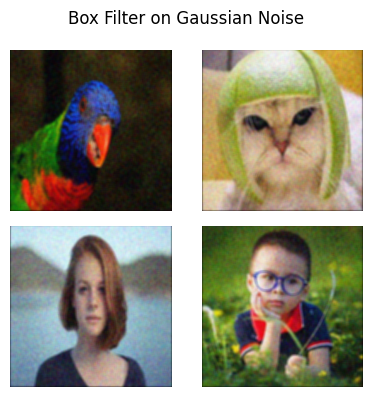

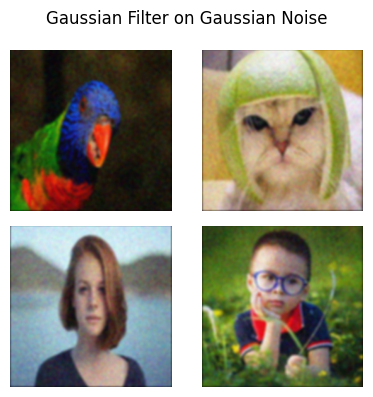

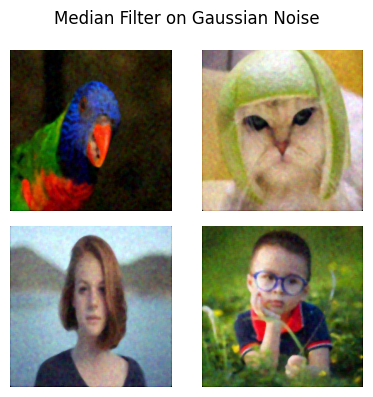

In [ ]:
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images1:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_gaussian)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_gaussian)
median_filter_images_gaussian = np.array(median_filter_images_gaussian)

show_image_grid(box_filter_images_gaussian, M=2, N=2, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_gaussian, M=2, N=2, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_gaussian, M=2, N=2, title='Median Filter on Gaussian Noise')

### Q3 [5 Marks]

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import cv2

# Helper Functions
def rgb_to_grayscale(rgb_image):
    """Convert RGB image to grayscale"""
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def gradient_calculation(gray_image):
    """Compute gradient magnitude and direction using Sobel filters."""

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    grad_x = convolve2d(gray_image, sobel_x, mode='same', boundary='fill', fillvalue=0)
    grad_y = convolve2d(gray_image, sobel_y, mode='same', boundary='fill', fillvalue=0)

    # Compute gradient magnitude and direction (angle)
    grad_magnitude = np.abs(grad_x) + np.abs(grad_y) # L1 norm (as L2 norm is not used by default in Opencv canny edge detector method)

    grad_direction = np.arctan2(grad_y, grad_x)

    return grad_magnitude, grad_direction

def non_maximum_suppression(grad_magnitude, grad_direction):
    """Suppress non-maximum edges by considering the gradient direction."""
    grad_direction = np.rad2deg(grad_direction) % 180  # Normalize angles to [0, 180)
    suppressed_image = np.zeros_like(grad_magnitude)

    for i in range(1, grad_magnitude.shape[0] - 1):
        for j in range(1, grad_magnitude.shape[1] - 1):
            angle = grad_direction[i, j]
            q, r = 255, 255

            # Check pixel gradients based on their direction and neighbors
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = grad_magnitude[i, j + 1]
                r = grad_magnitude[i, j - 1]
            elif 22.5 <= angle < 67.5:
                q = grad_magnitude[i + 1, j - 1]
                r = grad_magnitude[i - 1, j + 1]
            elif 67.5 <= angle < 112.5:
                q = grad_magnitude[i + 1, j]
                r = grad_magnitude[i - 1, j]
            elif 112.5 <= angle < 157.5:
                q = grad_magnitude[i - 1, j - 1]
                r = grad_magnitude[i + 1, j + 1]

            if grad_magnitude[i, j] >= q and grad_magnitude[i, j] >= r:
                suppressed_image[i, j] = grad_magnitude[i, j]
            else:
                suppressed_image[i, j] = 0

    return suppressed_image

def double_thresholding(grad_magnitude, low_threshold, high_threshold):
    """Apply double thresholding to classify strong and weak edges."""
    strong_pixel = 255
    weak_pixel = 75
    output_image = np.zeros_like(grad_magnitude)

    strong_edges = grad_magnitude >= high_threshold
    weak_edges = (grad_magnitude >= low_threshold) & (grad_magnitude < high_threshold)

    output_image[strong_edges] = strong_pixel
    output_image[weak_edges] = weak_pixel

    return output_image

def hysteresis(image, weak_edge_value=75, strong_edge_value=255):
    """Track edges using hysteresis to connect weak edges to strong edges."""
    rows, cols = image.shape
    final_edges = np.zeros_like(image)

    # The final step involves linking the detected edges. Strong edge pixels are automatically considered edges.
    # In the case of weak edge pixels, only those connected to strong edge pixels are classified as edges.
    # This process utilizes either BFS (Breadth-First Search) or DFS (Depth-First Search) to identify all edges.
    # In my case I have used Stack-based edge tracking (DFS)
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 ( 0, -1),         ( 0, 1),
                 ( 1, -1), ( 1, 0), ( 1, 1)]

    for i in range(rows):
        for j in range(cols):
            if image[i, j] == strong_edge_value:
                final_edges[i, j] = strong_edge_value
                stack = [(i, j)]

                while stack:
                    r, c = stack.pop()
                    for dr, dc in neighbors:
                        nr, nc = r + dr, c + dc
                        if 0 <= nr < i and 0 <= nc < j:
                            if image[nr, nc] == weak_edge_value and final_edges[nr, nc] == 0:
                                final_edges[nr, nc] = strong_edge_value
                                stack.append((nr, nc))

    return final_edges

In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2) # By default L2Gradient=False

    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

def apply_canny_edge_detector_self(image, threshold1, threshold2):
    # Convert to grayscale
    gray_image = rgb_to_grayscale(image)

    # Gradient calculation (magnitude and direction)
    grad_magnitude, grad_direction = gradient_calculation(gray_image)

    # Non-maximum suppression
    suppressed_image = non_maximum_suppression(grad_magnitude, grad_direction)

    # Double thresholding
    thresholded_image = double_thresholding(suppressed_image, threshold1, threshold2)

    # Edge tracking by hysteresis
    edges = hysteresis(thresholded_image)

    # Convert edges to 3-channel for visualization
    edges = cv2.cvtColor(edges.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    return edges

In [ ]:
threshold1 = 80
threshold2 = 180

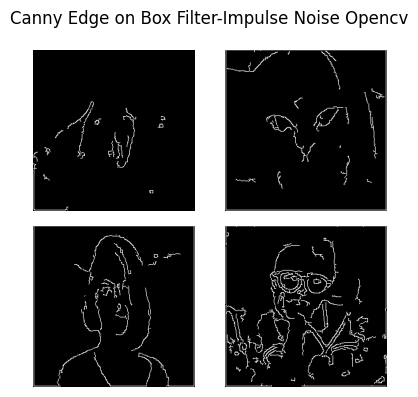

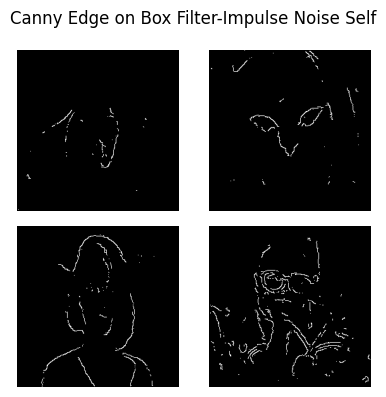

In [ ]:
canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_impulse = np.array(canny_edge_opencv_box_filter_images_impulse)
canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_opencv_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Self')

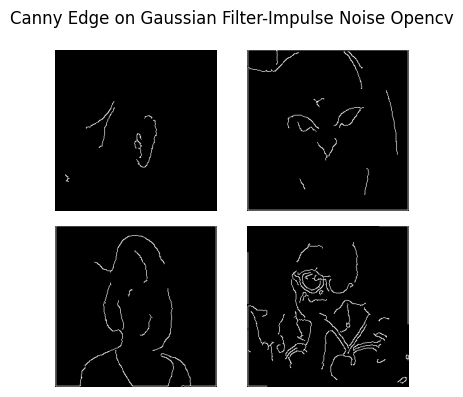

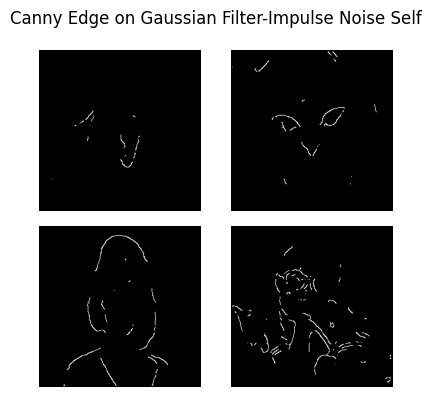

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_opencv_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

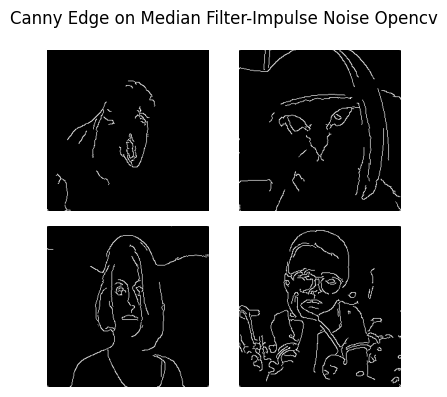

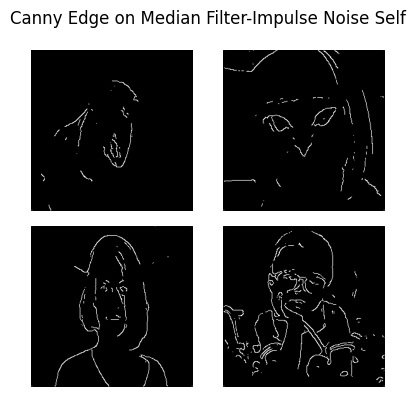

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_impulse = np.array(canny_edge_opencv_median_filter_images_impulse)
canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_opencv_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Self')

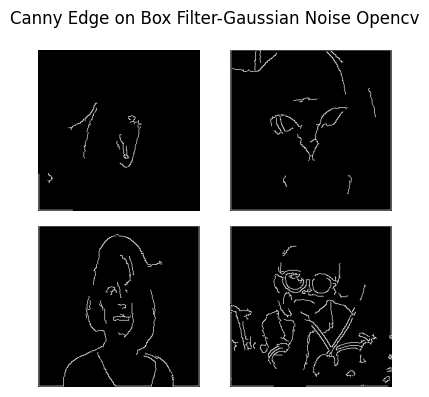

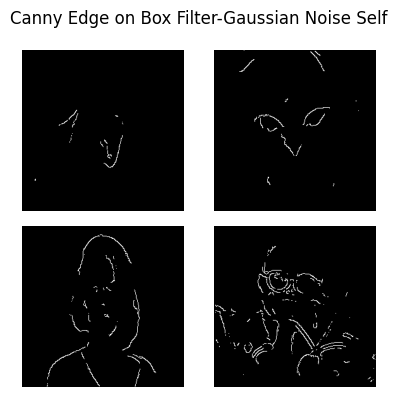

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_gaussian = np.array(canny_edge_opencv_box_filter_images_gaussian)
canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_opencv_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Self')

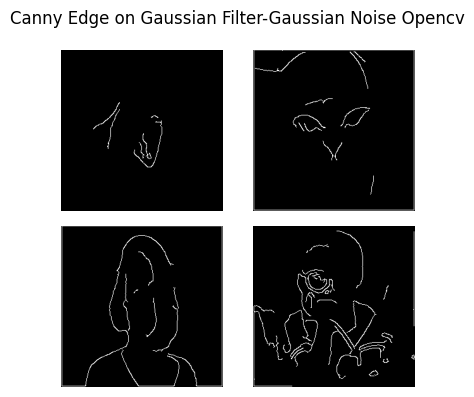

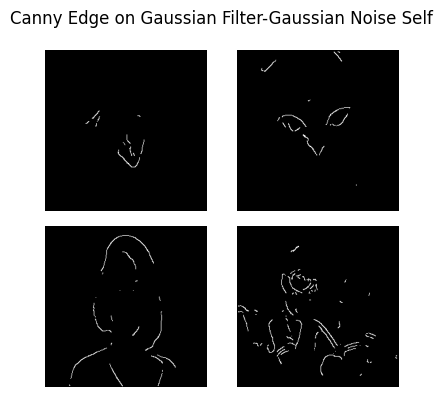

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_gaussian = np.array(canny_edge_opencv_gaussian_filter_images_gaussian)
canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_opencv_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

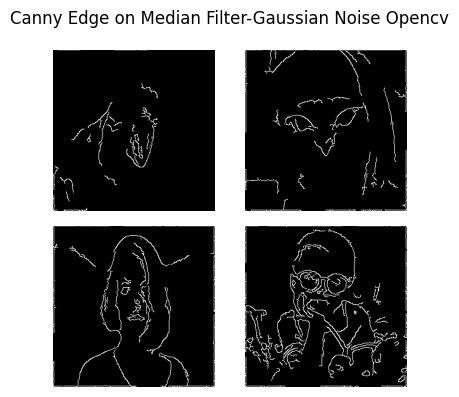

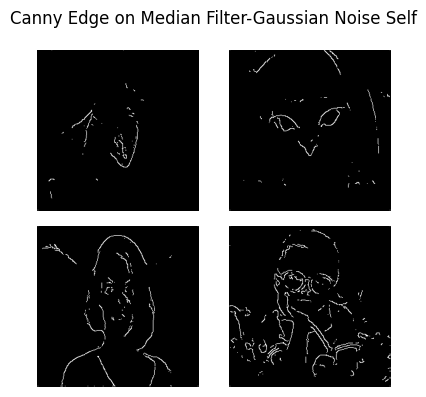

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_gaussian = np.array(canny_edge_opencv_median_filter_images_gaussian)
canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_opencv_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Self')

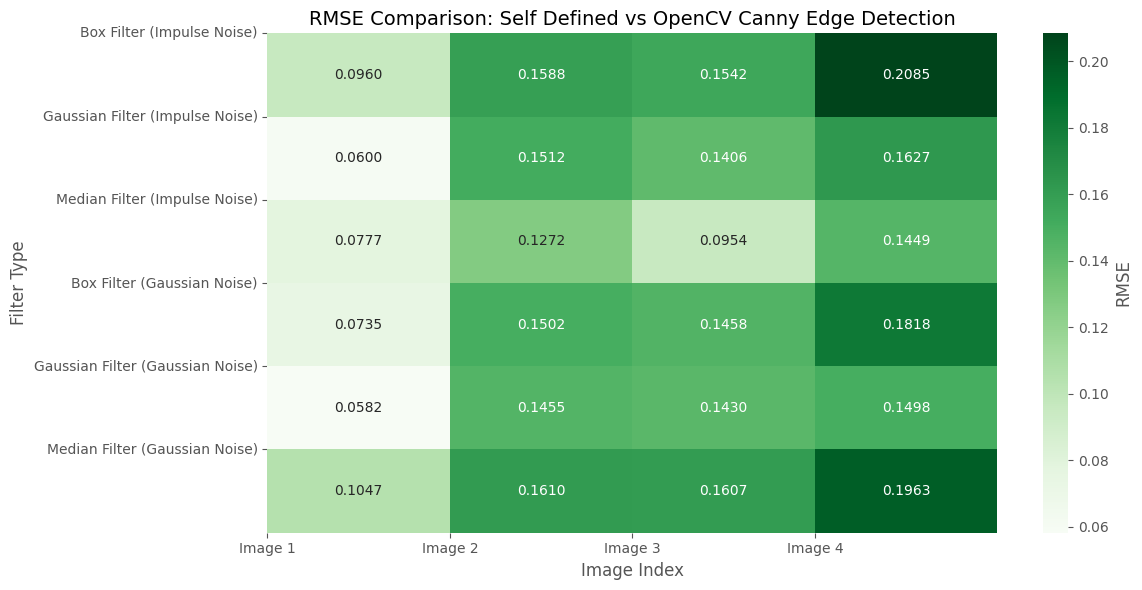

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def compute_rmse(img1, img2):
    """Compute RMSE between two images."""
    return np.sqrt(mean_squared_error(img1.flatten(), img2.flatten()))

# Group OpenCV and Custom Canny edge results in a dictionary for easier access
opencv_filter_sets = {
    'Box Filter (Impulse Noise)': canny_edge_opencv_box_filter_images_impulse,
    'Gaussian Filter (Impulse Noise)': canny_edge_opencv_gaussian_filter_images_impulse,
    'Median Filter (Impulse Noise)': canny_edge_opencv_median_filter_images_impulse,
    'Box Filter (Gaussian Noise)': canny_edge_opencv_box_filter_images_gaussian,
    'Gaussian Filter (Gaussian Noise)': canny_edge_opencv_gaussian_filter_images_gaussian,
    'Median Filter (Gaussian Noise)': canny_edge_opencv_median_filter_images_gaussian
}

custom_filter_sets = {
    'Box Filter (Impulse Noise)': canny_edge_self_box_filter_images_impulse,
    'Gaussian Filter (Impulse Noise)': canny_edge_self_gaussian_filter_images_impulse,
    'Median Filter (Impulse Noise)': canny_edge_self_median_filter_images_impulse,
    'Box Filter (Gaussian Noise)': canny_edge_self_box_filter_images_gaussian,
    'Gaussian Filter (Gaussian Noise)': canny_edge_self_gaussian_filter_images_gaussian,
    'Median Filter (Gaussian Noise)': canny_edge_self_median_filter_images_gaussian
}

# Initialize an empty array for the RMSE table
rmse_matrix = np.zeros((6, 4))

# Iterate through the filters and images to compute RMSE
for idx, (filter_name, opencv_images) in enumerate(opencv_filter_sets.items()):
    custom_images = custom_filter_sets[filter_name]

    for img_idx in range(4):  # Assume 4 images per filter set
        rmse_value = compute_rmse(opencv_images[img_idx], custom_images[img_idx])
        rmse_matrix[idx, img_idx] = rmse_value

# Create heatmap visualization of the RMSE matrix
plt.figure(figsize=(12, 6))
sns.heatmap(rmse_matrix, annot=True, cmap='Greens', fmt='.4f', cbar_kws={'label': 'RMSE'})

plt.title('RMSE Comparison: Self Defined vs OpenCV Canny Edge Detection', fontsize=14)
plt.xlabel('Image Index', fontsize=12)
plt.ylabel('Filter Type', fontsize=12)

# Set x and y axis labels
plt.xticks(ticks=range(4), labels=[f'Image {i+1}' for i in range(4)], rotation=0, fontsize=10)
plt.yticks(ticks=range(6), labels=list(opencv_filter_sets.keys()), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()
